<h1 align = 'center'> Crimes in King County!</h1>

<img src = 'img/WA_King county.png' width = 400, height = 300></img>

<br/>
<p>
King County is a county located in the U.S. state of Washington. The population was 2,233,163 in the 2018 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city. King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area. (The others are Snohomish County to the north and Pierce County to the south.) About two-thirds of King County's population lives in Seattle's suburbs. Here, our primary objective is to analyze crimes that are associated with this particular county provided by <b>King County Department of Adult and Juvenile Detention</b></p>

The dataset consists of adult jail bookings that have occurred within the last twelve months; specifically from January 1, 2019, to December 31, 2019. Every effort has been made to ensure the accuracy of data listed at the time of extraction. Updates, corrections, and additions may have occurred since the extraction date and time.
This dataset provides information associated with the booking of an individual into a King County jail facility, and not with any court cause, case, or criminal filing pursuant to the booking event. This information does not reflect the criminal history or criminal status of any inmate currently or previously in custody.</p>

In [142]:
#Load required libraries
import numpy as np
import pandas as pd
import datetime as dt
#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#Interactive plots
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected = True)
#Ignore warnigs if there any any
import warnings
warnings.filterwarnings('ignore')
print('Setup Complete')

Setup Complete


In [143]:
#Create funciton to read csv
def read_from_file(filename):
    df = pd.read_csv(filename)
    return df
csv_file = 'Adult_Jail_Booking_January_1__2019_to_December_31__2019_as_of_January_6__2020.csv'
kc_df = read_from_file(csv_file)
print('Shape of the data',kc_df.shape)

print(kc_df.info())
kc_df.head()

Shape of the data (55095, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55095 entries, 0 to 55094
Data columns (total 13 columns):
Book of Arrest Number        55095 non-null int64
Last Name                    55095 non-null object
First Name                   55095 non-null object
Middle Name                  48724 non-null object
JrSr                         2341 non-null object
Booking Date Time            55095 non-null object
Release Date Time            50147 non-null object
Current Facility             0 non-null float64
Charge                       55095 non-null object
Court Case / Cause Number    44058 non-null object
Court                        50267 non-null object
RCW / Ordinance Number       55019 non-null object
Release Reason               55095 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 5.5+ MB
None


,Book of Arrest Number,Last Name,First Name,Middle Name,JrSr,Booking Date Time,Release Date Time,Current Facility,Charge,Court Case / Cause Number,Court,RCW / Ordinance Number,Release Reason
0,219000001,COWLES,GERALD,ALLEN,NaN,01/01/2019 12:04:00 AM,01/02/2019 04:50:00 PM,NaN,DWLS 1,641205,Seattle Municipal Court,11.56.320,CONDITIONAL/COURT RELEASE
1,219000001,COWLES,GERALD,ALLEN,NaN,01/01/2019 12:04:00 AM,01/02/2019 04:50:00 PM,NaN,INTERLOCK VIOLATION,641205,Seattle Municipal Court,11.56.350,CONDITIONAL/COURT RELEASE
2,219000003,DUNKLEY,WINSTON,HARDEN,J,01/01/2019 12:33:00 AM,01/11/2019 12:34:00 AM,NaN,VIO DV ORD,641206,Seattle Municipal Court,12A.06.180,RELEASE ON BOND
3,219000004,FORSTER,AMANDA,CLARE,NaN,01/01/2019 12:42:00 AM,01/02/2019 05:32:00 PM,NaN,VEHICLE THEFT INV,NaN,NaN,2499,CONDITIONAL/COURT RELEASE
4,219000005,ELMOGHRBI,MOHAMED,NaN,NaN,01/01/2019 12:48:00 AM,01/02/2019 07:06:00 PM,NaN,ASSAULT INV,NaN,NaN,1399,CONDITIONAL/COURT RELEASE


The King Country Jail booking dataset consists of <b>55095</b> rows and <b>13 </b>columns. The row represents those who were arrested within the time frame specified above and columns define detailed attributes of the convicts such as Book of arrest number, name, the time they were arrested, charges they were accused of accompanied by the release date and reason.


Looking at the information, we can observe that there are missing values on attributes such as 
<code>Middle name</code>, <code>JrSr</code>,<code> Current Facility </code>, <code> Court </code>, <code> Case Number</code>and <code> Ordinanace Number</code>. As we are unaware about what these  values exactly might be, we will simply skip these missing values as it is and continue further with our analysis.

In [144]:
#Change object to datetime
def create_datetime(df,col,month,weekday,hour):
    df[col] = pd.to_datetime(df[col])
    df[month] = df[col].dt.month_name()
    df[weekday] = df[col].dt.weekday_name
    df[hour] = df[col].dt.hour
#Run function
create_datetime(kc_df,'Booking Date Time','b_month','b_week','b_hour')
create_datetime(kc_df,'Release Date Time','r_month','r_week','r_hour')

In [145]:
kc_df.head()

,Book of Arrest Number,Last Name,First Name,Middle Name,JrSr,Booking Date Time,Release Date Time,Current Facility,Charge,Court Case / Cause Number,Court,RCW / Ordinance Number,Release Reason,b_month,b_week,b_hour,r_month,r_week,r_hour
0,219000001,COWLES,GERALD,ALLEN,NaN,2019-01-01 00:04:00,2019-01-02 16:50:00,NaN,DWLS 1,641205,Seattle Municipal Court,11.56.320,CONDITIONAL/COURT RELEASE,January,Tuesday,0,January,Wednesday,16.0
1,219000001,COWLES,GERALD,ALLEN,NaN,2019-01-01 00:04:00,2019-01-02 16:50:00,NaN,INTERLOCK VIOLATION,641205,Seattle Municipal Court,11.56.350,CONDITIONAL/COURT RELEASE,January,Tuesday,0,January,Wednesday,16.0
2,219000003,DUNKLEY,WINSTON,HARDEN,J,2019-01-01 00:33:00,2019-01-11 00:34:00,NaN,VIO DV ORD,641206,Seattle Municipal Court,12A.06.180,RELEASE ON BOND,January,Tuesday,0,January,Friday,0.0
3,219000004,FORSTER,AMANDA,CLARE,NaN,2019-01-01 00:42:00,2019-01-02 17:32:00,NaN,VEHICLE THEFT INV,NaN,NaN,2499,CONDITIONAL/COURT RELEASE,January,Tuesday,0,January,Wednesday,17.0
4,219000005,ELMOGHRBI,MOHAMED,NaN,NaN,2019-01-01 00:48:00,2019-01-02 19:06:00,NaN,ASSAULT INV,NaN,NaN,1399,CONDITIONAL/COURT RELEASE,January,Tuesday,0,January,Wednesday,19.0


In [146]:
#Country frequencies of columns
kc_df.apply(lambda x: len(x.unique()))

Book of Arrest Number        32866
Last Name                    11592
First Name                    6010
Middle Name                   4760
JrSr                             8
Booking Date Time            29253
Release Date Time            19826
Current Facility                 1
Charge                       12898
Court Case / Cause Number    32840
Court                          228
RCW / Ordinance Number        1077
Release Reason                  22
b_month                         12
b_week                           7
b_hour                          24
r_month                         13
r_week                           8
r_hour                          25
dtype: int64

In [147]:
kc_df.isna().sum()

Book of Arrest Number            0
Last Name                        0
First Name                       0
Middle Name                   6371
JrSr                         52754
Booking Date Time                0
Release Date Time             4948
Current Facility             55095
Charge                           0
Court Case / Cause Number    11037
Court                         4828
RCW / Ordinance Number          76
Release Reason                   0
b_month                          0
b_week                           0
b_hour                           0
r_month                       4948
r_week                        4948
r_hour                        4948
dtype: int64

In [148]:
#Extract duration of sentence
kc_df['Duration'] = (kc_df['Release Date Time'] - kc_df['Booking Date Time']).astype('timedelta64[h]')

## Questions for the data
<ul>
<li>What are the top 5 charges poeple arrested in King Country commit? How severe are the cases?</li>
<li>What are the common release reason? Does this depend on the duration of their charges?</li>
<li>Are there any criminals? People who usually get arrested?</li>
<li>Which months has more number of criminal released? Peaceful months!</li>
<li>Are crimes mostly commited during night times?</li></ul>

# 1. What is the fluctuation of Crimes in King County?

In [149]:
#Convert datetime as dt
kc_df['Booking Date Time'] = kc_df['Booking Date Time'].dt.date

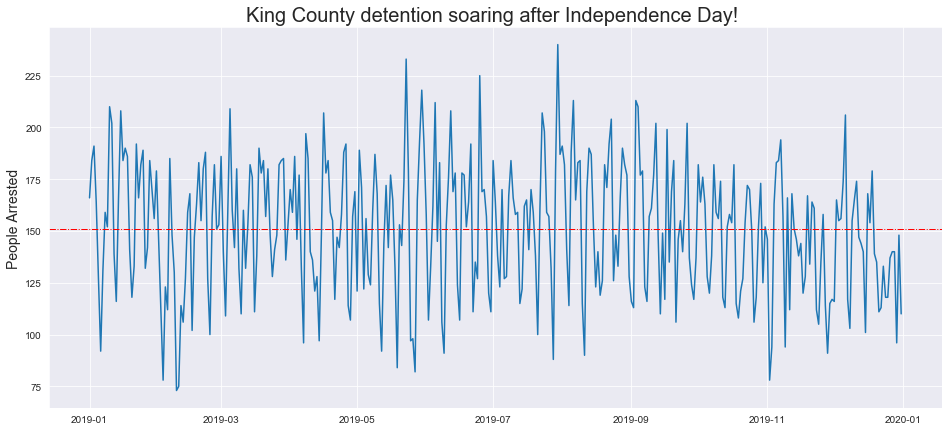

In [150]:
booking_count = kc_df['Booking Date Time'].value_counts()
plt.figure(figsize=(16,7))
ax = sns.lineplot(x=booking_count.index,y=booking_count.values)
ax.axhline(booking_count.values.mean(),color='red',linewidth=1,linestyle='-.')
plt.title('King County detention soaring after Independence Day! ',fontsize=20)
plt.ylabel('People Arrested',fontsize=14)
plt.show()

*The average number of violations registered was 150 over the year 2019, the maximum number of entries falling under the month of August followed by June and least in December. However, we are not obvious which periods had several people detained and would further like to examine every month.*

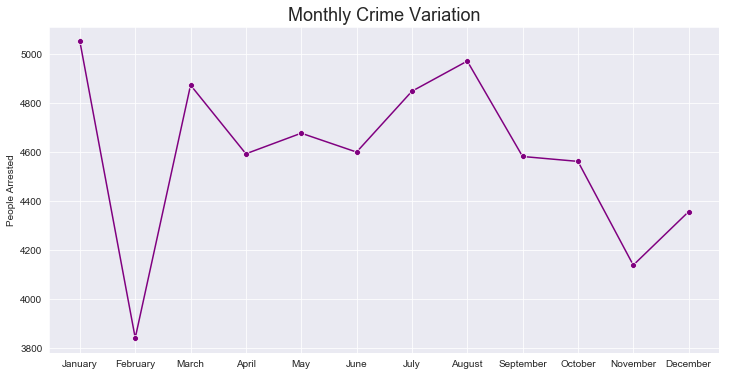

In [151]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
kc_df['b_month'] = pd.Categorical(kc_df['b_month'],categories=months,ordered=True)
def plot_line(df,col,marker,color,title):
    count = df[col].value_counts()
    plt.figure(figsize=(12,6))
    sns.lineplot(x=count.index,y=count.values,marker=marker,color=color)
    plt.title(title,fontsize=18)
    plt.ylabel('People Arrested')
    return plt.show()
plot_line(kc_df,'b_month','o','purple','Monthly Crime Variation')

*The highest number of arrests was in January with more than 5000 followed by August. Similarly, we can observe a sudden fall in February being the least and increasing further with inconsistency.*

# 2. What about weekdays? Are there any crime patterns?

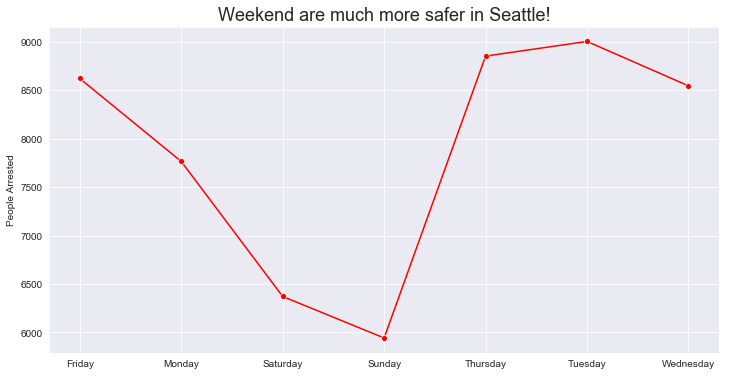

In [152]:
plot_line(kc_df,'b_week','o','red','Weekend are much more safer in Seattle!')

*The least number of crimes were committed on weekends whereas the maximum has been recorded on Tuesdays, Wednesdays, and Thursdays.*

# 3. Any Time Specific?

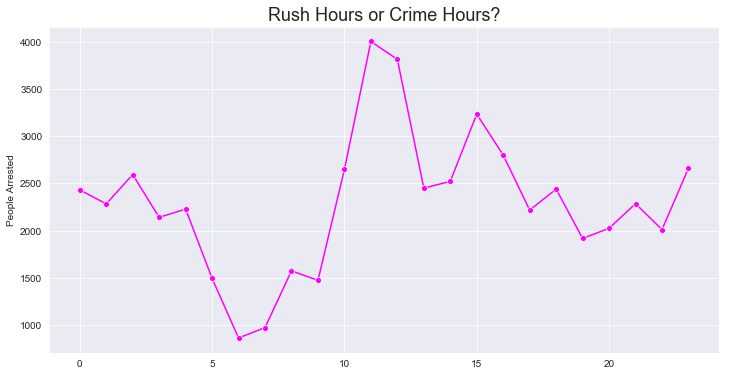

In [153]:
plot_line(kc_df,'b_hour','o','magenta','Rush Hours or Crime Hours?')

*There is a slight fall in the number of crimes between 12:00 AM to 5:00 AM because most people are inactive during this period. However, the number of offenses increases significantly from 6:00 AM till 10:00 AM being the highest and again moderately declining for the rest of the hours.*

# 4. The most frequent ones?

In [154]:
top_charges = kc_df['Charge'].value_counts(normalize=True).mul(100).round(2).sort_values().tail(10)
data = go.Bar(x=top_charges.values,y=top_charges.index,orientation='h',marker_color='rgb(31,120,180)')
layout = go.Layout(title='Top 10 Crimes')
plotly.offline.iplot({'data':data,'layout':layout})

*Considering that most violations happen during working hours, the usual recorded ones were <b>Driving Under Influence</b> with around <b>4.5%</b> of total arrests over a year. Subsequently, people were frequently accused of Drugs, Assault, and Burglary.*

# 5. Common reason for release?


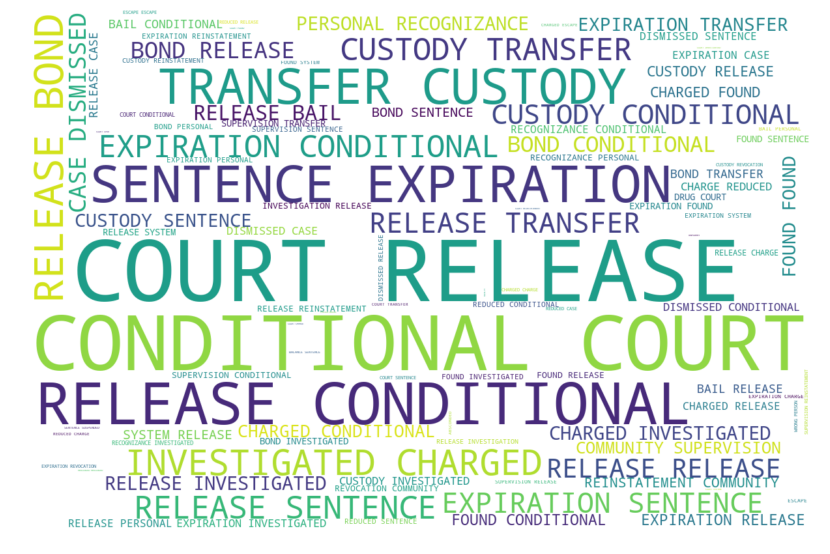

In [155]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white",width = 1200, height = 800, max_words=200,stopwords=stopwords, contour_width=3, contour_color='steelblue')
reasons = ' '.join([x for x in kc_df['Release Reason']])
plt.figure(figsize=(14,10))
wc.generate(reasons)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
top_release = kc_df['Release Reason'].value_counts(normalize=True).sort_values().tail(10)
fig = go.Figure()
fig.add_trace(go.Bar(y=top_release.index, x=top_release.values,orientation='h'))
fig.update_layout(title_text='Top 10 Release Reasons!')
fig.show()

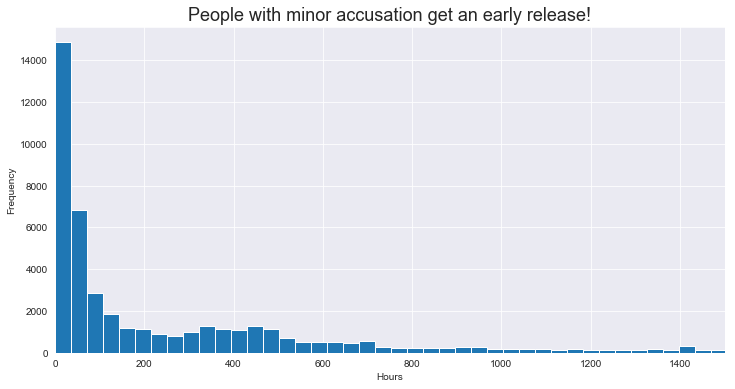

In [172]:
#Filter negative value for duration
kc_df['Duration'] = kc_df.loc[kc_df['Duration']>0]['Duration']
plt.figure(figsize=(12,6))
kc_df['Duration'].plot.hist(bins=224)
plt.xlim(0,1500)
plt.xlabel('Hours')
plt.title('People with minor accusation get an early release!',fontsize=18)
plt.show()